# Car-price-prediction

# Labaries import

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow  as tf
import seaborn as sns
%matplotlib inline
from sklearn.model_selection  import train_test_split  
from tensorflow.keras import models, layers, optimizers, utils

In [199]:
cars_data = pd.read_csv("carprice_Assignment.csv")
cars_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [200]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [201]:
#rechecking the values
cars_data.iloc[3,2] = 'audi 100ls'

In [202]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# columns drop of "car_ID"

In [203]:
cars_data.drop(columns = ['car_ID'], inplace= True)

In [204]:
# shape of the data
cars_data.shape

(205, 25)

In [205]:
cars_data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100ls', 'audi fox', 'audi 5000',
       'audi 4000', 'audi 5000s (diesel)', 'bmw 320i', 'bmw x1', 'bmw x3',
       'bmw z4', 'bmw x4', 'bmw x5', 'chevrolet impala',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda accord cvcc', 'honda accord lx',
       'honda civic 1500 gl', 'honda accord', 'honda civic 1300',
       'honda prelude', 'honda civic (auto)', 'isuzu MU-X',
       'isuzu D-Max ', 'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf',
       'jaguar xk', 'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe',
       'mazda rx-4', 'mazda glc deluxe', 'mazda 626', 'mazda glc',
       'mazda rx-7 gs', 'mazda glc 4', 'mazda glc custom 

In [206]:
#info the dataframe
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [207]:
cars_data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [208]:
print(cars_data.columns)

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [209]:
# describe the data
cars_data.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


# Null values checking

In [210]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [211]:
cars_data.isnull()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Correlation

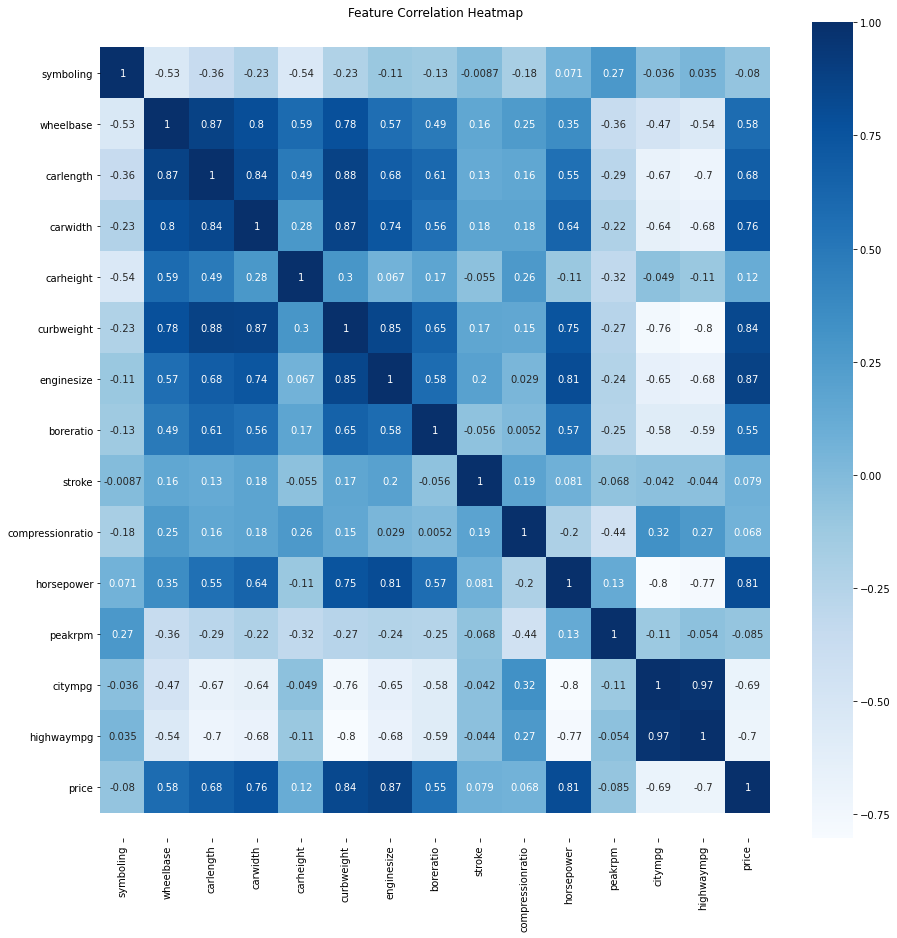

In [212]:
corr = cars_data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Categorical_columns

In [213]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


# convert non_numerical values in numerical values

In [214]:
 from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cars_data['fueltype'] = labelencoder.fit_transform(cars_data["fueltype"])
cars_data['aspiration'] = labelencoder.fit_transform(cars_data['aspiration'])
cars_data['carbody'] = labelencoder.fit_transform(cars_data['carbody'])
cars_data['drivewheel'] = labelencoder.fit_transform(cars_data['drivewheel'])
cars_data['enginelocation'] = labelencoder.fit_transform(cars_data['enginelocation'])
cars_data["fuelsystem"] = labelencoder.fit_transform(cars_data['fuelsystem'])


In [215]:
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [216]:
def number_(x):
    return x.map({'four':4, 'two': 2})

cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [217]:
#rechecking
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [218]:
# cylindernumber - Cylinder placed in the car
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [219]:
def convert_number(x):
    return x.map({'two': 2, "three": 3, 'four': 4, 'five': 5, "six": 6, "eight": 8, 'twelve': 12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [220]:
# rechecking
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [221]:
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100ls,1,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [222]:
# fueltype - Car fuel type i.e gas or diesel
cars_data['fueltype'].value_counts()

1    185
0     20
Name: fueltype, dtype: int64

In [223]:
#aspiration - Aspiration used in a car
cars_data["aspiration"].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [224]:
# carbody- body of car
cars_data['carbody'].value_counts()

3    96
2    70
4    25
1     8
0     6
Name: carbody, dtype: int64

In [225]:
# drivewheel - type of drive wheel
cars_data['drivewheel'].value_counts()


1    120
2     76
0      9
Name: drivewheel, dtype: int64

In [226]:
# enginelocation - Location of car engine
cars_data['enginelocation'].value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

In [227]:
# Wheelbase - wheelbase of car
cars_data['wheelbase'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
96.3      6
107.9     6
98.8      6
99.1      6
104.3     6
100.4     6
93.1      5
97.2      5
102.4     5
109.1     5
95.9      5
101.2     4
97.0      4
114.2     4
95.3      4
105.8     3
103.5     3
110.0     3
89.5      3
99.8      2
86.6      2
113.0     2
104.5     2
104.9     2
88.6      2
96.9      2
91.3      2
115.6     2
102.9     2
96.1      2
103.3     2
112.0     1
99.5      1
88.4      1
99.2      1
96.0      1
102.0     1
106.7     1
93.0      1
99.4      1
93.3      1
102.7     1
120.9     1
95.1      1
96.6      1
94.3      1
108.0     1
Name: wheelbase, dtype: int64

In [228]:
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

In [229]:
# enginetype - Type of engine.
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [230]:
# fuelsystem - Fuel system of car
cars_data['fuelsystem'].value_counts()

5    94
1    66
3    20
0    11
6     9
2     3
7     1
4     1
Name: fuelsystem, dtype: int64

In [231]:
cars_data1 = cars_data[['horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'wheelbase', 'drivewheel', 'price', 'enginelocation']]

In [232]:
cars_data1

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0
...,...,...,...,...,...,...,...,...,...,...
200,114,3.78,141,2952,68.9,188.8,109.1,2,16845.0,0
201,160,3.78,141,3049,68.8,188.8,109.1,2,19045.0,0
202,134,3.58,173,3012,68.9,188.8,109.1,2,21485.0,0
203,106,3.01,145,3217,68.9,188.8,109.1,2,22470.0,0


# Split the data into test and train

In [233]:
x = (cars_data1.loc[:, cars_data1.columns !='price'])
y = (cars_data1.loc[:, cars_data1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [234]:
y_train.values

array([[11248. ],
       [16503. ],
       [10698. ],
       [ 6855. ],
       [20970. ],
       [ 7295. ],
       [22018. ],
       [10345. ],
       [ 6938. ],
       [18150. ],
       [ 7603. ],
       [ 6095. ],
       [16695. ],
       [ 9538. ],
       [12945. ],
       [12764. ],
       [ 6669. ],
       [ 7957. ],
       [ 7609. ],
       [18620. ],
       [16845. ],
       [18150. ],
       [16500. ],
       [ 6189. ],
       [11048. ],
       [ 7609. ],
       [34028. ],
       [ 6989. ],
       [ 5118. ],
       [ 7295. ],
       [17075. ],
       [10595. ],
       [ 6377. ],
       [15510. ],
       [13845. ],
       [ 6529. ],
       [16925. ],
       [18950. ],
       [ 8058. ],
       [17710. ],
       [ 8558. ],
       [32528. ],
       [15985. ],
       [ 7126. ],
       [17450. ],
       [ 5399. ],
       [12440. ],
       [ 9495. ],
       [16630. ],
       [ 8013. ],
       [16430. ],
       [10245. ],
       [ 5572. ],
       [ 5348. ],
       [11199. ],
       [13

In [235]:
x_train.shape

(143, 9)

In [236]:
x_test

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
15,182,3.62,209,3230,66.9,189.0,103.5,2,0
9,160,3.13,131,3053,67.9,178.2,99.5,0,0
100,97,3.33,120,2302,65.2,173.4,97.2,1,0
132,110,3.54,121,2658,66.5,186.6,99.1,1,0
68,123,3.58,183,3750,70.3,190.9,110.0,2,0
...,...,...,...,...,...,...,...,...,...
56,101,3.33,70,2380,65.7,169.0,95.3,2,0
128,207,3.74,194,2800,65.0,168.9,89.5,2,1
76,68,2.97,92,1918,64.4,157.3,93.7,1,0
144,82,3.62,108,2385,65.4,172.0,97.0,0,0


In [237]:
x_train

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
177,92,3.31,122,2458,66.5,175.6,102.4,1,0
75,175,3.78,140,2910,68.0,178.4,102.7,2,0
174,73,3.27,110,2480,66.5,175.6,102.4,1,0
31,76,2.91,92,1819,63.9,144.6,86.6,1,0
12,121,3.31,164,2710,64.8,176.8,101.2,2,0
...,...,...,...,...,...,...,...,...,...
106,160,3.43,181,3139,67.9,178.5,99.2,2,0
14,121,3.31,164,3055,66.9,189.0,103.5,2,0
92,69,3.15,97,1938,63.8,165.3,94.5,1,0
179,161,3.27,171,3016,67.7,183.5,102.9,2,0


In [238]:
y_test

,price
15,30760.000
9,17859.167
100,9549.000
132,11850.000
68,28248.000
...,...
56,11845.000
128,37028.000
76,5389.000
144,9233.000


# Normalize the data

In [239]:
mean = x_train.mean(axis = 0)
x_train -=mean
std = x_train.std(axis=0)
x_train /= std

x_test -=mean
x_test /= std

In [240]:
x_train

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
177,-0.339563,-0.038773,-0.121004,-0.220606,0.234282,0.076145,0.571301,-0.638990,-0.118681
75,1.717747,1.687015,0.313395,0.644684,0.921744,0.301819,0.620694,1.188522,-0.118681
174,-0.810513,-0.185649,-0.410604,-0.178490,0.234282,0.076145,0.571301,-0.638990,-0.118681
31,-0.736153,-1.507529,-0.845003,-1.443881,-0.957319,-2.422386,-2.030063,-0.638990,-0.118681
12,0.379256,-0.038773,0.892594,0.261812,-0.544842,0.172863,0.373729,1.188522,-0.118681
...,...,...,...,...,...,...,...,...,...
106,1.345944,0.401854,1.302861,1.083072,0.875913,0.309879,0.044442,1.188522,-0.118681
14,0.379256,-0.038773,0.892594,0.922265,0.417605,1.156156,0.752408,1.188522,-0.118681
92,-0.909661,-0.626276,-0.724336,-1.216073,-1.003149,-0.754012,-0.729381,-0.638990,-0.118681
179,1.370731,-0.185649,1.061528,0.847605,0.784251,0.712868,0.653622,1.188522,-0.118681


In [241]:
x_test

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,enginelocation
15,1.891255,1.099513,1.978593,1.257278,0.417605,1.156156,0.752408,1.188522,-0.118681
9,1.345944,-0.699713,0.096196,0.918437,0.875913,0.285699,0.093835,-2.466503,-0.118681
100,-0.215628,0.034665,-0.169271,-0.519246,-0.361518,-0.101170,-0.284844,-0.638990,-0.118681
132,0.106601,0.805762,-0.145137,0.162265,0.234282,0.962721,0.027978,-0.638990,-0.118681
68,0.428830,0.952637,1.351127,2.252744,1.975852,1.309291,1.822589,1.188522,-0.118681
...,...,...,...,...,...,...,...,...,...
56,-0.116481,0.034665,-1.375935,-0.369926,-0.132364,-0.455800,-0.597667,1.188522,-0.118681
128,2.510927,1.540140,1.616593,0.434104,-0.453180,-0.463860,-1.552598,1.188522,8.367018
76,-0.934447,-1.287216,-0.845003,-1.254360,-0.728165,-1.398794,-0.861096,-0.638990,-0.118681
144,-0.587431,1.099513,-0.458870,-0.360354,-0.269857,-0.214007,-0.317773,-2.466503,-0.118681


# create  the  model

In [242]:
#model = models.Sequential()
#model.add(layers.Dense(10, activation = "relu", input_shape=(x_train.shape[1],)))
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(8, activation = 'relu')) 
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(6, activation = 'relu'))  
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(6, activation = 'relu' ))
#model.add(layers.Dropout(0.3))
#model.add(layers.Dense(1,))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [243]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, activation='relu', input_shape = (x_train.shape[1,])))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Densse(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [244]:
#from keras import models
#from keras import layers

#def build_model():
    #model = models.Sequential()
   # model.add(layers.Dense(64, activation='relu', input_shape = (x_data.shape[1,])))
    #model.add(layers.Dense(64, activation='relu'))
   # model.add(layers.Densse(1))
   # model.compile(optimizer='rmsprop', los='mse', metrics=['mae'])
    #return model

In [249]:
#model = build_model()
#history = model.fit(x_train, y_train, epochs=80, batch_size=16, verbose=0)

In [250]:
#history=model.fit(x_train, y_train, epochs = 80, batch_size=1, verbose=0)

# Compile the model

In [251]:
# model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# validation the train_data (k_fold_validation)

In [252]:
k = 4
num_val_samples = len(x_train)//k
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_x_train = np.concatenate([x_train[:i * num_val_samples],x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_y_train = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]], axis=0)
    

    model.fit(partial_x_train, partial_y_train,validation_data = (val_data, val_targets),
             epochs=100, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    all_scores
    np.mean(all_scores)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [191]:
all_scores

[1327.81494140625, 1817.3978271484375, 2074.27978515625, 1889.6982421875]

In [256]:
model = build_model()
model.fit(x_train,y_train, epochs = 80, batch_size = 1, verbose = 1)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

TypeError: tuple indices must be integers or slices, not tuple

In [192]:
#model = build_model()
#history=model.fit(x_train, y_train, epochs = 80, batch_size=1, verbose=0)

In [193]:
np.mean(all_scores)

1777.2976989746094

In [194]:
#print(np.mean(all_scores))

In [195]:
#model = build_model()
#model.fit(x_train, y_train, epochs=80, batch_size=16, verbose=0)
#test_mse_score, test_mae_score = model.evalute(x_test, y_test)

In [196]:
history=model.fit(x_train, y_train, epochs = 80, batch_size=1, verbose=0)

In [197]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 9093279.0000 - mae: 1767.2941


# predict the model

In [537]:
y_pred = model.predict(x_test)
y_pred

array([[18903.742 ],
       [23544.875 ],
       [ 9343.551 ],
       [13862.618 ],
       [27050.979 ],
       [ 7678.815 ],
       [ 7670.0303],
       [ 7725.2793],
       [ 9767.187 ],
       [ 8334.869 ],
       [13918.374 ],
       [ 8461.154 ],
       [13306.878 ],
       [11570.499 ],
       [45198.414 ],
       [ 7272.887 ],
       [ 8473.975 ],
       [14405.573 ],
       [ 8683.907 ],
       [ 9059.581 ],
       [10452.808 ],
       [13941.689 ],
       [ 7707.6226],
       [ 7007.457 ],
       [ 7180.32  ],
       [19708.43  ],
       [10379.102 ],
       [16139.794 ],
       [ 7660.102 ],
       [15146.79  ],
       [26301.268 ],
       [ 7094.3384],
       [10294.555 ],
       [19874.072 ],
       [ 8790.603 ],
       [26281.176 ],
       [10576.663 ],
       [14004.415 ],
       [ 7246.3374],
       [15002.607 ],
       [ 8479.158 ],
       [15504.034 ],
       [14494.904 ],
       [ 8111.2144],
       [ 7566.9272],
       [ 8879.906 ],
       [ 7094.3394],
       [ 6814